字段名可以直接使用“中文”

#-------------孙老师备注----------


<font size =4 color ="blue"> 筱原两基准 </font>

- 所有实际值均以2015年为基准年；
- 数据表仅为展示用途，并非全部变量。

<font size =4 color ="blue"> 区位相对优势基准 </font>

- 为何采用工业增加值总量？<br>
- 后面的产业不安全是工业产业，产业的选取依据是什么？<br>
- 没有各产业的就业人数和工业就业人数，无法计算劳动生产率指标。<br>

<font size =4 color ="blue"> 就业吸纳率指标 </font>

- 因为每个产业的就业人数是城镇就业，所以某产业就业吸纳率=某产业的城镇就业人口/该地城镇就业总人数


#-------------马兰备注--------------
- 第1,2算法使用的是excel中的英文字段，第三种算法使用的中文字段。都可以运行，可相互参考
- 英文字段有后缀标记地区，各个地区的中文字段没差异

- 结合前端展示，考虑使用中文字段还是英文。代码会作相应调整（如果改成中文，参考第三个算法写法）

<br>

-  目前算法只是计算单个地区，单个变量的计算，可修改成多个地区多个变量的计算，方便比较(最后一个算法有举例）




In [4]:
#引包：引入所需python包
import xlrd
import os
import re
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm


from sklearn.metrics import roc_curve,auc
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy import nan
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

from scipy.stats import kstest
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
dir = "data/"
print(os.listdir(dir))  

['.ipynb_checkpoints', '3.区位相对优势基准', '2.筱原两基准', '4.就业吸纳率的计算']


# 筱原两基准

国民收入（亿元）:	gdp <br>
工业增加值(亿元):	gdp2_indaN_bj <br>
建筑业增加值(亿元):	gdp2_bindaN_bj <br>
交通运输仓储和邮电业增加值(亿元):	gdp3_tspaN_bj <br>
批发和零售业增加值(亿元):	gdp3_wraN_bj <br>
金融业增加值(亿元):	gdp3_fiaN_bj <br>
房地产业增加值(亿元):	gdp3_reaN_bj <br>
信息传输、计算机服务和软件业增加值(亿元):	gdp3_infN_bj <br>
租赁和商务服务业增加值(亿元):	gdp3_renN_bj <br>
科学研究、技术服务与地质勘查业增加值(亿元):	gdp3_sicN_bj <br>
现代制造业增加值(亿元):	gdp_momN_bj <br>
现代服务业增加值(亿元):	gdp_mosN_bj <br>
信息产业增加值(亿元):	gdp_infN_bj <br>
战略性新兴产业增加值(亿元):	gdp_traN_bj <br>
高技术产业增加值(亿元):	gdp_tecN_bj <br>

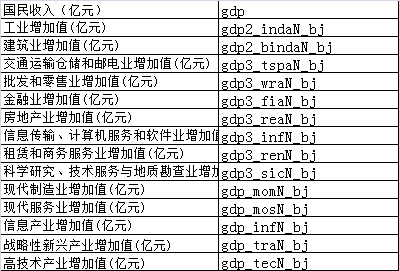

## 数据源

In [10]:
dir = r"data/2.筱原两基准/三地区产值/"
print(os.listdir(dir))

['天津.xlsx', '河北.xlsx', '北京.xlsx']


In [18]:
# 数据源
file = "北京.xlsx"
bj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
bj_data = pd.read_excel(dir+file,bj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
bj_data.head(2)

,gdp,gdp2_indaN_bj,gdp2_bindaN_bj,gdp3_tspaN_bj,gdp3_wraN_bj,gdp3_fiaN_bj,gdp3_reaN_bj,gdp3_infN_bj,gdp3_renN_bj,gdp3_sicN_bj,gdp_momN_bj,gdp_mosN_bj,gdp_infN_bj,gdp_traN_bj,gdp_tecN_bj
1996,NaN,579.2,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,639.7,146.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
file = "河北.xlsx"
hb_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
hb_data = pd.read_excel(dir+file,hb_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
hb_data.head(2)

,gdp,gdp2_indaN_hb,gdp2_bindaN_hb,gdp3_tspaN_hb,gdp3_wraN_hb,gdp3_fiaN_hb,gdp3_reaN_hb,gdp3_infN_hb,gdp3_renN_hb,gdp3_sicN_hb,gdp2_tecN_hb,gdp2_emiN_hb
1996,NaN,1463.18,201.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,1701.42,232.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
file = "天津.xlsx"
tj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
tj_data = pd.read_excel(dir+file,tj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
tj_data.head(2)

,gdp,gdp2_indaN_tj,gdp2_bindaN_tj,gdp3_tspaN_tj,gdp3_wraN_tj,gdp3_fiaN_tj,gdp3_reaN_tj,gdp3_infN_tj,gdp3_sicN_tj,gdp3_renN_tj,...,gdp2_emiN_tj,gdp2_traN_tj,gdp3_infwN_tj,gdp2_hemiN_tj,gdp2_nmiN_tj,gdp2_biN_tj,gdp2_neciN_tj,gdp2_neiN_tj,gdp2_epiN_tj,gdp2_teclN_tj
obs,,,,,,,,,,,,,,,,,,,,,
1996,NaN,549.81,59.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,609.65,66.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 衍生“国民收入增长率”

In [28]:
bj_data["gdp_growrate"] = (bj_data["gdp"]-bj_data["gdp"].shift(1))/bj_data["gdp"].shift(1)
bj_data[["gdp_growrate"]]

,gdp_growrate
1996,NaN
1997,NaN
1998,NaN
1999,NaN
2000,NaN
2001,NaN
2002,NaN
2003,NaN
2004,NaN
2005,NaN


In [17]:
hb_data["gdp_growrate"] = (hb_data["gdp"]-hb_data["gdp"].shift(1))/hb_data["gdp"].shift(1)
tj_data["gdp_growrate"] = (tj_data["gdp"]-tj_data["gdp"].shift(1))/tj_data["gdp"].shift(1)

## 定义函数

In [45]:
def twobench (area ,col1) :  # 可修改为同时计算多个地区，多个指标，再结果进行比较
    # 选择数据源
    if area == "北京" :
        data = bj_data.copy()
        s1 = "_bj"  # 字段后缀
    elif area == "河北" :
        data = hb_data.copy()
        s1 = "_hb"
    elif area == "天津" :  
        data == tj_data.copy()
        s1 = "_tj"
    # 计算 行业 增加值增长率
    data[col1+"增长率"] = data[col1]/  data["gdp2_indaN"+s1]   
    ## 计算 收入弹性系数
    data[col1+"收入弹性系数"] = data[col1+"增长率"]/data["gdp_growrate"]
    results = data[[col1+"收入弹性系数"]]
    #删除空值
    results = results.dropna()  
    
    return results

## 调用函数

In [46]:
twobench(area = "北京",col1 = "gdp2_bindaN_bj")

,gdp2_bindaN_bj收入弹性系数
2011,1.511525
2012,2.212689
2013,2.124065
2014,2.972791
2015,3.163888
2016,3.041321
2017,2.920752
2018,3.470507


# 区位相对优势基准

## 数据源

In [47]:
dir = r"data/3.区位相对优势基准/三地区产值/"
print(os.listdir(dir))

['天津.xlsx', '河北.xlsx', '北京.xlsx']


In [48]:
file = "北京.xlsx"
bj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
bj_data = pd.read_excel(dir+file,bj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
bj_data.head(2)

,gdp2_indaN_bj,gdp2_bindaN_bj,gdp3_tspaN_bj,gdp3_wraN_bj,gdp3_fiaN_bj,gdp3_reaN_bj,gdp3_infN_bj,gdp3_renN_bj,gdp3_sicN_bj,gdp_momN_bj,gdp_mosN_bj,gdp_infN_bj,gdp_traN_bj,gdp_tecN_bj
obs,,,,,,,,,,,,,,
1996,579.2,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,639.7,146.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
file = "河北.xlsx"
hb_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
hb_data = pd.read_excel(dir+file,hb_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
hb_data.head(2)

,gdp2_indaN_hb,gdp2_bindaN_hb,gdp3_tspaN_hb,gdp3_wraN_hb,gdp3_fiaN_hb,gdp3_reaN_hb,gdp3_infN_hb,gdp3_renN_hb,gdp3_sicN_hb,gdp2_tecN_hb,gdp2_emiN_hb
obs,,,,,,,,,,,
1996,1463.18,201.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1701.42,232.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
file = "天津.xlsx"
tj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name("Sheet1") # gbk：字符编码
tj_data = pd.read_excel(dir+file,tj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
tj_data.head(2)

,gdp2_indaN_tj,gdp2_bindaN_tj,gdp3_tspaN_tj,gdp3_wraN_tj,gdp3_fiaN_tj,gdp3_reaN_tj,gdp3_infN_tj,gdp3_sicN_tj,gdp3_renN_tj,gdp2_medN_tj,...,gdp2_emiN_tj,gdp2_traN_tj,gdp3_infwN_tj,gdp2_hemiN_tj,gdp2_nmiN_tj,gdp2_biN_tj,gdp2_neciN_tj,gdp2_neiN_tj,gdp2_epiN_tj,gdp2_teclN_tj
obs,,,,,,,,,,,,,,,,,,,,,
1996,549.81,59.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,609.65,66.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 定义函数

In [51]:
def advantage (area ,col1) :  # 可修改为同时计算多个
    # 选择数据源
    if area == "北京" :
        data = bj_data.copy()
        s1 = "_bj"  # 字段后缀
    elif area == "河北" :
        data = hb_data.copy()
        s1 = "_hb"
    elif area == "天津" :  
        data == tj_data.copy()
        s1 = "_tj"
    # 计算 产业比重
    data[col1+"产值比重"] = data[col1]/  data["gdp2_indaN"+s1]   

    results = data[[col1+"产值比重"]]
    #删除空值
    results = results.dropna()  
    
    return results

## 调用函数

In [52]:
advantage(area = "河北",col1 = "gdp2_bindaN_hb")

,gdp2_bindaN_hb产值比重
obs,
1996,0.137666
1997,0.136921
1998,0.143948
1999,0.154801
2000,0.142265
2001,0.133971
2002,0.128172
2003,0.135431
2004,0.127810


# 就业吸纳率

三个地区数据源的年份有的有“年”有的“没有”，需要一致

## 数据源

In [55]:
dir = r"data/4.就业吸纳率的计算/"
print(os.listdir(dir))

['天津.xlsx', '河北.xlsx', '北京.xlsx']


In [98]:
file = "北京.xlsx"
bj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name(r"就业") # gbk：字符编码
bj_data = pd.read_excel(dir+file,bj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
bj_data.index = bj_data.index.str.replace("年","").astype("int")
bj_data.head(2)

,就业总人口,城镇单位就业人员(万人),农林牧渔业城镇单位就业人员(万人),采矿业城镇单位就业人员(万人),制造业城镇单位就业人员(万人),电力、热力、燃气及水生产和供应业城镇单位就业人员(万人),建筑业城镇单位就业人员(万人),交通运输、仓储和邮政业城镇单位就业人员(万人),信息传输、软件和信息技术服务业城镇单位就业人员(万人),批发和零售业城镇单位就业人员(万人),...,科学研究和技术服务业城镇单位就业人员(万人),水利、环境和公共设施管理业城镇单位就业人员(万人),居民服务、修理和其他服务业城镇单位就业人员(万人),教育业城镇单位就业人员(万人),卫生和社会工作城镇单位就业人员(万人),文化、体育和娱乐业城镇单位就业人员(万人),公共管理、社会保障和社会组织城镇单位就业人员(万人),年末常住人口(万人),城镇人口(万人),乡村人口(万人)
年份,,,,,,,,,,,,,,,,,,,,,
2010,1220.1,646.6,3.20,4.50,100.60,6.80,39.40,51.00,41.70,55.40,...,45.70,8.80,7.40,40.6,20.70,15.30,41.10,1962,1686.0,275.0
2011,1186.1,685.9,2.36,6.72,107.77,9.02,42.53,57.41,49.09,63.57,...,50.57,8.96,7.33,42.6,22.43,16.51,43.09,2019,1740.0,279.0


In [100]:
type(bj_data.index)

pandas.core.indexes.numeric.Int64Index

In [59]:
file = "河北.xlsx"
hb_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name(r"就业") # gbk：字符编码
hb_data = pd.read_excel(dir+file,hb_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
hb_data.head(2)

,就业人员（万人）,全省总就业人数,城镇单位就业人员(万人),农林牧渔业城镇单位就业人员(万人),采矿业城镇单位就业人员(万人),制造业城镇单位就业人员(万人),电力、热力、燃气及水生产和供应业城镇单位就业人员(万人),建筑业城镇单位就业人员(万人),交通运输、仓储和邮政业城镇单位就业人员(万人),信息传输、软件和信息技术服务业城镇单位就业人员(万人),...,金融业城镇单位就业人员(万人),房地产业城镇单位就业人员(万人),租赁和商务服务业城镇单位就业人员(万人),科学研究和技术服务业城镇单位就业人员(万人),水利、环境和公共设施管理业城镇单位就业人员(万人),居民服务、修理和其他服务业城镇单位就业人员(万人),教育业城镇单位就业人员(万人),卫生和社会工作城镇单位就业人员(万人),文化、体育和娱乐业城镇单位就业人员(万人),公共管理、社会保障和社会组织城镇单位就业人员(万人)
指标,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
file = "天津.xlsx"
tj_data = xlrd.open_workbook(dir+file, encoding_override="gbk").sheet_by_name(r"就业") # gbk：字符编码
tj_data = pd.read_excel(dir+file,tj_data.name,index_col=0,na_values=['9999']) # na_values：缺失值设置
tj_data.index = tj_data.index.str.replace("年","").astype("int")
tj_data.head(2)

,就业,就业人员总数（万人）,城镇单位就业人员(万人),农林牧渔业城镇单位就业人员(万人),采矿业城镇单位就业人员(万人),制造业城镇单位就业人员(万人),电力、热力、燃气及水生产和供应业城镇单位就业人员(万人),建筑业城镇单位就业人员(万人),交通运输、仓储和邮政业城镇单位就业人员(万人),信息传输、软件和信息技术服务业城镇单位就业人员(万人),...,金融业城镇单位就业人员(万人),房地产业城镇单位就业人员(万人),租赁和商务服务业城镇单位就业人员(万人),科学研究和技术服务业城镇单位就业人员(万人),水利、环境和公共设施管理业城镇单位就业人员(万人),居民服务、修理和其他服务业城镇单位就业人员(万人),教育业城镇单位就业人员(万人),卫生和社会工作城镇单位就业人员(万人),文化、体育和娱乐业城镇单位就业人员(万人),公共管理、社会保障和社会组织城镇单位就业人员(万人)
指标,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 定义函数

In [88]:
def employment (area ,col1) :  # 单个地区，单个变量
    s1 = col1.split("业")[0]+"业"
    print(s1)
    # 选择数据源
    if area == "北京" :
        data = bj_data.copy()
 
    elif area == "河北" :
        data = hb_data.copy()
 
    elif area == "天津" :  
        data == tj_data.copy()

    # 计算 产业比重
    data[s1+"就业吸纳率"] = data[col1]/  data["城镇单位就业人员(万人)"]   

    results = data[[s1+"就业吸纳率"]]
    #删除空值
    results = results.dropna()  
    
    return results

In [127]:
def employments(col_list) :
    results = pd.DataFrame(index = bj_data.index)
    areas = ["北京","河北","天津"]  #和下面的数据框列表的位置对应。
    i = 0
    for data in [bj_data,hb_data,tj_data] :
        s_list = [ ]
        for col1  in col_list : 
            s1 = col1.split("业")[0]+"业"
            s_list.append(s1)
            data[areas[i] + s1+"就业吸纳率"] = data[col1]/  data["城镇单位就业人员(万人)"]
        result1 = data[[areas[i] + s1+"就业吸纳率" for s1 in s_list ]]
        results = results.merge(result1,how ="left",left_index =True,right_index =True)
        i = i + 1
    results = results.dropna()  
    return results

## 调用函数

In [128]:
employment(area = "河北",col1 = "农林牧渔业城镇单位就业人员(万人)")

农林牧渔业


,农林牧渔业就业吸纳率
指标,
2008,0.014950
2009,0.014054
2010,0.012702
2011,0.010281
2012,0.008904
2013,0.008020
2014,0.006949
2015,0.006479
2016,0.006082


In [129]:
employments(col_list = ["农林牧渔业城镇单位就业人员(万人)","采矿业城镇单位就业人员(万人)"])

,北京农林牧渔业就业吸纳率,北京采矿业就业吸纳率,河北农林牧渔业就业吸纳率,河北采矿业就业吸纳率,天津农林牧渔业就业吸纳率,天津采矿业就业吸纳率
年份,,,,,,
2010,0.004949,0.006959,0.012702,0.053503,0.003403,0.043753
2011,0.003441,0.009797,0.010281,0.051168,0.002237,0.038809
2012,0.003541,0.009591,0.008904,0.046455,0.001903,0.023939
2013,0.004217,0.009107,0.008020,0.043269,0.001752,0.025162
2014,0.004273,0.008084,0.006949,0.041543,0.001692,0.022470
2015,0.005004,0.006805,0.006479,0.038282,0.001798,0.022050
2016,0.004662,0.005723,0.006082,0.035599,0.002972,0.015382
2017,0.004195,0.005069,0.006463,0.037006,0.002301,0.024492
